# Classification of Job Title in the UNC System
This project focuses on classifying the job title of employees in the UNC System. Data sourced from: https://uncdm.northcarolina.edu/salaries/index.php.

## Why are we trying to classify job title?
The reason that I am analyzing this data is that I just find it interesting. This dataset has plenty of entries as well as features to engineer. Working with a dataset like this truly allows for freedom in methodology to express myself through my code. I could absolutely just go on Kaggle and find a pre-cleaned dataset to just throw into a model, but this is far more entertaining. Also, my father works in the UNC system so I thought it would be entertaining to see how it would predict him. I won't be doing this in this notebook since it will be public, but just know that the computer got it right that he's a professor.

## Importing packages
As usual with any data science project, we'll be using pandas, numpy, matplotlib, seaborn, and sklearn. We'll import different modules from sklearn later in the notebook as we need them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Description
Let's read in our data. We'll be reading in the file from an excel spreadsheet hosted on my github. In order to read this in we need to have openpyxl installed. 

In [2]:
# if you don't have openpyxl pacakge uncomment the following line
#!pip install openpyxl

In [3]:
df = pd.read_excel("https://github.com/SullyRC/UNC-System-Job-Title-Classification/blob/main/Salary%20Data%20Export.xlsx?raw=true")

Now let's get an understanding of our data. The first 5 rows of data are shown below.

In [4]:
df.head()

,INSTITUTION NAME,LAST NAME,FIRST NAME,INIT,AGE,INITIAL HIRE DATE,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE
0,WSSU,Ables,Eddie,NaN,49,"SEP 01, 2017",IT (Information Technology) Professional,51461.0,Administrative Data Center,Technology Support Analyst
1,WSSU,Adams,Nelson,NaN,66,"AUG 16, 1982",Professor,93343.0,Psychological Sciences,Professor
2,WSSU,Adeyeye,John,O,69,"JUL 01, 2004",Professor,97549.0,Mathematics,Professor
3,WSSU,Adjei-Fremah,Sarah,NaN,34,"AUG 02, 2021",Assistant Professor,66500.0,Biological Sciences,"Assistant Professor, Biology - Genetics and Mi..."
4,WSSU,Afolayan,LaTanya,D,64,"JUL 10, 2018",Chief Development / Advancement Officer,148625.0,University Advancement,Vice Chancellor for University Advancement


This gives us a little bit of understanding about what is going on in our data. Let's look at the columns now and see more generally what these columns mean.

In [5]:
df.columns

Index(['INSTITUTION NAME', 'LAST NAME', 'FIRST NAME', 'INIT', 'AGE',
       'INITIAL HIRE DATE', 'JOB CATEGORY', 'EMPLOYEE ANNUAL BASE SALARY',
       'EMPLOYEE HOME DEPARTMENT', 'PRIMARY WORKING TITLE'],
      dtype='object')

In this dataset we have:
- Instituition name
- Last name
- First name
- Init (middle initial)
- Age
- Initial hire date
- Job Category
- Salary
- Employee home department
- Primary working title

We can drop some of these features, particularly the names of the employees, that aren't useful for classification. We'll reassign our dataframe now to the current dataframe with the name columns dropped.

In [6]:
df = df.drop(columns= ['FIRST NAME','LAST NAME','INIT'])

Here is what we are left with.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46685 entries, 0 to 46684
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   INSTITUTION NAME             46685 non-null  object 
 1   AGE                          46685 non-null  int64  
 2   INITIAL HIRE DATE            46685 non-null  object 
 3   JOB CATEGORY                 46685 non-null  object 
 4   EMPLOYEE ANNUAL BASE SALARY  46685 non-null  float64
 5   EMPLOYEE HOME DEPARTMENT     46685 non-null  object 
 6   PRIMARY WORKING TITLE        46685 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.5+ MB


Looking at our data we can see a lot of features being objects. For some of these we can clean the data to make it numeric (hire date). Others will have to be put into dummy columns or be hot encoded. We also presumably need to rework our home departments into a smaller number of departments. This is because different schools call their departments different things. Also it is important to note that we don't appear to have any nulls in our data. 

## Data Cleaning
In this portion of the notebook we'll go through each of our object features and transform them into something that we can put into a model.

In [8]:
print(len(df['INSTITUTION NAME'].unique()))
df['INSTITUTION NAME'].unique()

17


array(['WSSU', 'WCU', 'UNCW', 'UNCSA', 'UNCP', 'UNCG', 'UNCC', 'UNCA',
       'UNC-System-Office', 'UNC-CH', 'NCSU', 'NCCU', 'NCA&T', 'FSU',
       'ECU', 'ECSU', 'ASU'], dtype=object)

We can create dummy columns for this feature. Let's try this out. 

In [9]:
df = pd.get_dummies(data=df,columns=['INSTITUTION NAME'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46685 entries, 0 to 46684
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE                                 46685 non-null  int64  
 1   INITIAL HIRE DATE                   46685 non-null  object 
 2   JOB CATEGORY                        46685 non-null  object 
 3   EMPLOYEE ANNUAL BASE SALARY         46685 non-null  float64
 4   EMPLOYEE HOME DEPARTMENT            46685 non-null  object 
 5   PRIMARY WORKING TITLE               46685 non-null  object 
 6   INSTITUTION NAME_ASU                46685 non-null  uint8  
 7   INSTITUTION NAME_ECSU               46685 non-null  uint8  
 8   INSTITUTION NAME_ECU                46685 non-null  uint8  
 9   INSTITUTION NAME_FSU                46685 non-null  uint8  
 10  INSTITUTION NAME_NCA&T              46685 non-null  uint8  
 11  INSTITUTION NAME_NCCU               46685

Now let's take a look at how we can handle hire date.

In [10]:
df['INITIAL HIRE DATE'].unique()[0:10]

array(['SEP 01, 2017', 'AUG 16, 1982', 'JUL 01, 2004', 'AUG 02, 2021',
       'JUL 10, 2018', 'JAN 17, 2022', 'JUL 15, 2009', 'AUG 11, 2016',
       'JUN 07, 2004', 'MAY 10, 2021'], dtype=object)

Looking at this sample of 10, we can see that we might be able to get the hire year by grabbing the last 4 characters of each hire date. Let's try doing that.

In [11]:
df['Hire Year'] = df['INITIAL HIRE DATE'].apply(lambda x: x[-4:])
df['Hire Year'].unique()

array(['2017', '1982', '2004', '2021', '2018', '2022', '2009', '2016',
       '2014', '2002', '2003', '2005', '2007', '2001', '2020', '2019',
       '2000', '2011', '2013', '2006', '2012', '1992', '1995', '1991',
       '1998', '2008', '2015', '1997', '1988', '2010', '1989', '1984',
       '1986', '1999', '1994', '1987', '1993', '1970', '1990', '1996',
       '1974', '1985', '1976', '1979', '1978', '1977', '1983', '1966',
       '1981', '1971', '1980', '1961', '1973', '1975', '1972', '1967',
       '1963', '1968', '1969'], dtype=object)

It looks like this worked. We want this to be numeric so we need to convert the hire year from an object datatype to a numeric datatype. Let's do that really quick.

In [12]:
df['Hire Year'] = pd.to_numeric(df['Hire Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46685 entries, 0 to 46684
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE                                 46685 non-null  int64  
 1   INITIAL HIRE DATE                   46685 non-null  object 
 2   JOB CATEGORY                        46685 non-null  object 
 3   EMPLOYEE ANNUAL BASE SALARY         46685 non-null  float64
 4   EMPLOYEE HOME DEPARTMENT            46685 non-null  object 
 5   PRIMARY WORKING TITLE               46685 non-null  object 
 6   INSTITUTION NAME_ASU                46685 non-null  uint8  
 7   INSTITUTION NAME_ECSU               46685 non-null  uint8  
 8   INSTITUTION NAME_ECU                46685 non-null  uint8  
 9   INSTITUTION NAME_FSU                46685 non-null  uint8  
 10  INSTITUTION NAME_NCA&T              46685 non-null  uint8  
 11  INSTITUTION NAME_NCCU               46685

We see that this worked. Let's now move on to the last three categories. Let's check the lengths of unique options for these 3 columns.

In [13]:
len(df['EMPLOYEE HOME DEPARTMENT'].unique())

3015

In [14]:
len(df['PRIMARY WORKING TITLE'].unique())

5984

In [15]:
len(df['JOB CATEGORY'].unique())

909

Looking at the lengths of the unqiue array for each column, we see that there are a lot of different values for each of these columns. We need to put these into bins that make the data easier to work with. To accomplish this we can create a dictionary of each substring in our column. We'll do this the hard way for now, but there is likely an easier way to do this. Also because primary working title and job category are similar descriptions and job category has less unique columns, we'll drop primary working title.

### Handling Department Names
Now we're gonna work through department names. To start we'll craete the dictionary we talked about earlier. Our first step is to get the unique substrings in the department names. We'll loop through the unique deparment names and split the names by a space and add each substring into a set.

In [16]:
department_substrings = set()
for department in df['EMPLOYEE HOME DEPARTMENT'].unique():
    if department not in department_substrings:
        if ' ' in department:
            department_split = department.split(' ')
            for substring in department_split:
                if ("(" not in substring) & (")" not in substring):
                    if substring.lower() not in department_substrings:
                        department_substrings.add(substring.lower())
        else:
            if department.lower() not in department_substrings:
                department_substrings.add(department.lower())

Let's check how many substrings we have.

In [17]:
len(department_substrings)

2462

We now have all of our substrings for deparments in a set. Now we need to loop through the set and find the most occuring values in our dictionary. We'll create a dataframe with the counts of each substring for departments.

In [18]:
department_counts = [0] * len(department_substrings)
department_df = pd.DataFrame(list(zip(department_substrings,department_counts)),columns=['Substring','Counts'])

Now we'll loop through our original dataframe and count how many times a substring appear and assign that to the count column in our counting dataframe.

In [19]:
for substring in department_df['Substring']:
    department_df.loc[department_df['Substring'] == substring,
                      'Counts'] = len(df.loc[df['EMPLOYEE HOME DEPARTMENT'].str.lower().str.contains(substring)])

Let's see what our dataframe looks like.

In [20]:
department_df = department_df.sort_values(by='Counts',ascending=False)
department_df

,Substring,Counts
0,,46685
1385,e,38922
1727,s,37936
1568,c,36211
504,n,36031
...,...,...
1909,cals-assoc,1
110,groups,1
563,agreement,1
955,loans,1


Looking at our substrings we see that we have a lot of substrings that are just 1 letter long. Let's subset our dataframe with substrings that have length longer than 2. We'll also spit our this subsetted dataframe to a csv to view there.

In [21]:
department_df[(department_df['Substring'].str.len() > 3) & (department_df['Counts'] > 5)].to_csv('data_dictionary.csv')

Now we need to manually go through and decide what we want to make our substrings for department. There will be 2 lists, one that contains the substring and another that contains the re-assigned department.

In [22]:
substring_list = ['serv','health','comp','search','medicine','comm','house','libr','info','admin','pyschology',
                 'management','facil','engi','biol','soci','chem','math','devel','nurs','police','dean','engl',
                 'resource','busin','athle','mgmt','psychi','finance','arts','physics','environment','history','econ','music',
                 'safety','hospital','stat','admiss','counsel','chan','sociology','recreation','accounting']
department_names = ['Student Services','Health Center','Computer Science','Research','Medicine','Communications',
                   'Housekeeping','library','Information Technology','Administration','Pyschology',"Management",
                   'Facilities','Engineering',"Biology",'Social Science','Chemistry','Math','Development','Nursing',
                   'Police',"Dean's Office",'English','Resource Officer','Business','Athletics','Management','Psychiatry',
                   'Finance','Liberal Arts','Physics','Environmental Sciences','History','Economics','Music','Public Safety',
                   'Hospital','Statistics','Admissions','Counseling',"Chancellor's Office",'Sociology','Recreation Center',
                   'Accounting']

Now we loop through the lists and assign the values based off of substring. An important thing to note is that we'll likely lose some information when we do this. We also shouldn't expect these 16 departments to cover everything. We also need to worry about some departments having multiple names. EG what would happen if we had computer engineering. We would assign thatto computer science since it has comp in the name and comp is first in the list.

In [23]:
df['Department'] = [0] * len(df)
for index in list(range(len(substring_list))):
    substring = substring_list[index]
    department = department_names[index]
    df.loc[df['EMPLOYEE HOME DEPARTMENT'].str.lower().str.contains(substring),'Department'] = department 

Let's check how many employees are in each department.

In [24]:
df['Department'].value_counts()

0                         21673
Health Center              1383
Student Services           1148
Research                   1055
Communications             1049
Biology                    1006
Management                 1005
Computer Science            979
library                     975
Medicine                    944
Housekeeping                940
Information Technology      880
Facilities                  854
Athletics                   690
Engineering                 657
Nursing                     595
English                     577
Development                 561
Resource Officer            532
Dean's Office               511
Chemistry                   508
Administration              504
Statistics                  497
Business                    463
Psychiatry                  449
Social Science              427
Physics                     414
Liberal Arts                404
Math                        390
History                     388
Counseling                  385
Police  

We've got all of our departments down except for 21673. We'll call these departments unknown.

In [25]:
df.loc[df['Department'] == 0,'Department'] = 'Unknown'

Let's continue doing this but with job titles.

### Handling Job Title
We'll repeat the same process we did with the departments.

In [26]:
job_substrings = set()
for department in df['JOB CATEGORY'].unique():
    if department not in department_substrings:
        if ' ' in department:
            department_split = department.split(' ')
            for substring in department_split:
                if ("(" not in substring) & (")" not in substring):
                    if substring.lower() not in job_substrings:
                        job_substrings.add(substring.lower())
        else:
            if department.lower() not in job_substrings:
                job_substrings.add(department.lower())

Let's check how many substrings we have.

In [27]:
len(job_substrings)

681

Like we did before, we're going to create a dataframe with the counts of each substring.

In [28]:
job_counts = [0] * len(job_substrings)
job_df = pd.DataFrame(list(zip(job_substrings,job_counts)),columns=['Substring','Counts'])
job_df = job_df[job_df['Substring'].str.len() > 2]
for substring in job_df['Substring']:
    job_df.loc[job_df['Substring'] == substring,
                      'Counts'] = len(df.loc[df['JOB CATEGORY'].str.lower().str.contains(substring,regex=False)])

Let's check our value counts for our counting dataframe now.

In [29]:
job_df.sort_values(by = 'Counts',ascending=False).head(40)

,Substring,Counts
648,professional,15778
138,professor,11859
611,assistant,8633
352,"professional,",8246
630,assoc,4975
152,admin,4554
175,associate,4320
490,research,3806
244,administrative,3463
42,support,2968


Looking at we see we have about half of our values in the first 2 columns. Professional is a weird name though. Let's look into what professional includes.

In [30]:
df[df['JOB CATEGORY'].str.lower().str.contains('professional')]

,AGE,INITIAL HIRE DATE,JOB CATEGORY,EMPLOYEE ANNUAL BASE SALARY,EMPLOYEE HOME DEPARTMENT,PRIMARY WORKING TITLE,INSTITUTION NAME_ASU,INSTITUTION NAME_ECSU,INSTITUTION NAME_ECU,INSTITUTION NAME_FSU,...,INSTITUTION NAME_UNCA,INSTITUTION NAME_UNCC,INSTITUTION NAME_UNCG,INSTITUTION NAME_UNCP,INSTITUTION NAME_UNCSA,INSTITUTION NAME_UNCW,INSTITUTION NAME_WCU,INSTITUTION NAME_WSSU,Hire Year,Department
0,49,"SEP 01, 2017",IT (Information Technology) Professional,51461.0,Administrative Data Center,Technology Support Analyst,0,0,0,0,...,0,0,0,0,0,0,0,1,2017,Administration
5,31,"JAN 17, 2022",Accounting Professional,59183.0,Accounting,Accountant,0,0,0,0,...,0,0,0,0,0,0,0,1,2022,Accounting
9,43,"MAY 10, 2021","Student Registration / Records Professional, A...",63550.0,Registrar,Associate Registrar,0,0,0,0,...,0,0,0,0,0,0,0,1,2021,Unknown
13,74,"AUG 01, 2017","Research Professional, Life Sciences",56939.0,College of Arts Science Business Ed,Research Associate,0,0,0,0,...,0,0,0,0,0,0,0,1,2017,Liberal Arts
17,63,"MAR 01, 2001",Community Development Professional,111910.0,Center for Community Safety,Executive Director of Center For Community Safety,0,0,0,0,...,0,0,0,0,0,0,0,1,2001,Public Safety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46653,40,"JUL 15, 2019","Academic Services Professional, Support Center...",62835.0,College of Arts and Sciences,Director of AppELS Institute,1,0,0,0,...,0,0,0,0,0,0,0,0,2019,Liberal Arts
46656,33,"AUG 03, 2016","Athletics Training Professional, Trainer",45000.0,Special Projects,Asst Football Athletic Trainer,1,0,0,0,...,0,0,0,0,0,0,0,0,2016,Unknown
46675,28,"JAN 16, 2016","Academic Advising Professional, Advisor/Coordi...",47000.0,Student Learning Center,Acad. Advisor For Athletes,1,0,0,0,...,0,0,0,0,0,0,0,0,2016,Unknown
46676,41,"AUG 14, 2003",Academic Services Professional,55380.0,University Writing Center,Writing Ctr & WAC Consultant,1,0,0,0,...,0,0,0,0,0,0,0,0,2003,Unknown


Seeing this we don't want to include professional into our target. Let's go through and condense job titles.

In [31]:
substring_list2 = ['i.t','it ','it/systems','professor','admin','research','housekeeper','lecturer',
                   'coordinator','clerical','medical','program']
job_names = ['IT','IT','IT','Professor','Admin','Researcher','Housekeeper','Lecturer','Coordinator',
             'Cleric','Medical','Program Manager']
df['Job'] = [0] * len(df)
for index in list(range(len(substring_list2))):
    substring = substring_list2[index]
    job = job_names[index]
    df.loc[df['JOB CATEGORY'].str.lower().str.contains(substring,regex=False),'Job'] = job

Let's check the value counts for jobs.

In [32]:
df['Job'].value_counts()

0                  18513
Professor          11859
Admin               2952
Researcher          2882
IT                  2212
Housekeeper         1727
Lecturer            1522
Coordinator         1396
Cleric              1395
Medical             1242
Program Manager      985
Name: Job, dtype: int64

We now have our final job names. These will be our target. We don't want to include unkown targets so let's subset our dataframe so that we only have our dataframe where our dataframe doesn't have unknown job titles.

In [33]:
working_df = df[df['Job'] != 0]
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28172 entries, 0 to 46684
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE                                 28172 non-null  int64  
 1   INITIAL HIRE DATE                   28172 non-null  object 
 2   JOB CATEGORY                        28172 non-null  object 
 3   EMPLOYEE ANNUAL BASE SALARY         28172 non-null  float64
 4   EMPLOYEE HOME DEPARTMENT            28172 non-null  object 
 5   PRIMARY WORKING TITLE               28172 non-null  object 
 6   INSTITUTION NAME_ASU                28172 non-null  uint8  
 7   INSTITUTION NAME_ECSU               28172 non-null  uint8  
 8   INSTITUTION NAME_ECU                28172 non-null  uint8  
 9   INSTITUTION NAME_FSU                28172 non-null  uint8  
 10  INSTITUTION NAME_NCA&T              28172 non-null  uint8  
 11  INSTITUTION NAME_NCCU               28172

Now it's time to finally get all our data into numeric data. We'll use the padas dummy function for our department. Since job is our target, we'll have to label encode it instead.

In [34]:
working_df = pd.get_dummies(data=working_df,columns=['Department'])

In [35]:
from sklearn.preprocessing import LabelEncoder

In order to label encode and replace our Job title, we'll need to create a dictionary. This is so we have the target values in actual words for later. This will allow our evaluation visualizations to be more interpretable.

In [36]:
le = LabelEncoder().fit(working_df['Job'])
keys = le.classes_
LabelDict = dict(zip(keys, le.transform(keys)))
inv_LabelDict = {v: k for k, v in LabelDict.items()}
working_df['Job'] = working_df['Job'].replace(LabelDict)

In [37]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28172 entries, 0 to 46684
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   AGE                                 28172 non-null  int64  
 1   INITIAL HIRE DATE                   28172 non-null  object 
 2   JOB CATEGORY                        28172 non-null  object 
 3   EMPLOYEE ANNUAL BASE SALARY         28172 non-null  float64
 4   EMPLOYEE HOME DEPARTMENT            28172 non-null  object 
 5   PRIMARY WORKING TITLE               28172 non-null  object 
 6   INSTITUTION NAME_ASU                28172 non-null  uint8  
 7   INSTITUTION NAME_ECSU               28172 non-null  uint8  
 8   INSTITUTION NAME_ECU                28172 non-null  uint8  
 9   INSTITUTION NAME_FSU                28172 non-null  uint8  
 10  INSTITUTION NAME_NCA&T              28172 non-null  uint8  
 11  INSTITUTION NAME_NCCU               28172

Now let's drop the columns that we made stuff off of. 

In [38]:
working_df = working_df.drop(columns = ['INITIAL HIRE DATE','JOB CATEGORY','EMPLOYEE HOME DEPARTMENT',
                                       'PRIMARY WORKING TITLE'])

## Viusalizations
Before we dive into creating models, we'll get some exploritory visualizations. We want to ensure data integrity and get an understanding of how our features are distributed.

The first one we'll look at is the age distribution.

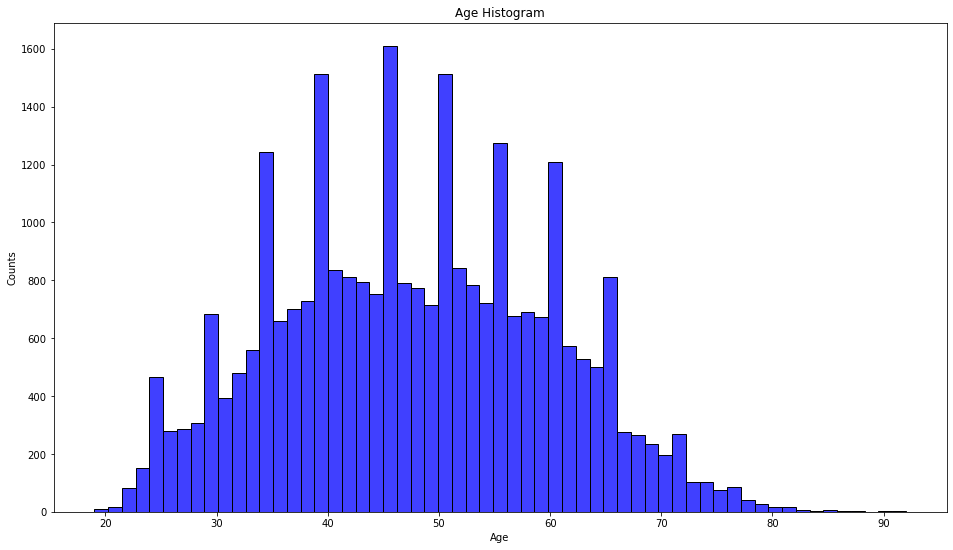

In [39]:
plt.figure(figsize=(16,9))
sns.histplot(working_df['AGE'],color='Blue')
plt.title("Age Histogram")
plt.ylabel("Counts")
plt.xlabel("Age")
plt.show()

What's interesting about this is that our data almost looks normally distributed except for a couple of really high points. This might be happening due to people rounding there ages to the nearest five years. The data almost looks like it backs this up because the highpoints are only at 5 year intervals.

Now let's look at Salary.

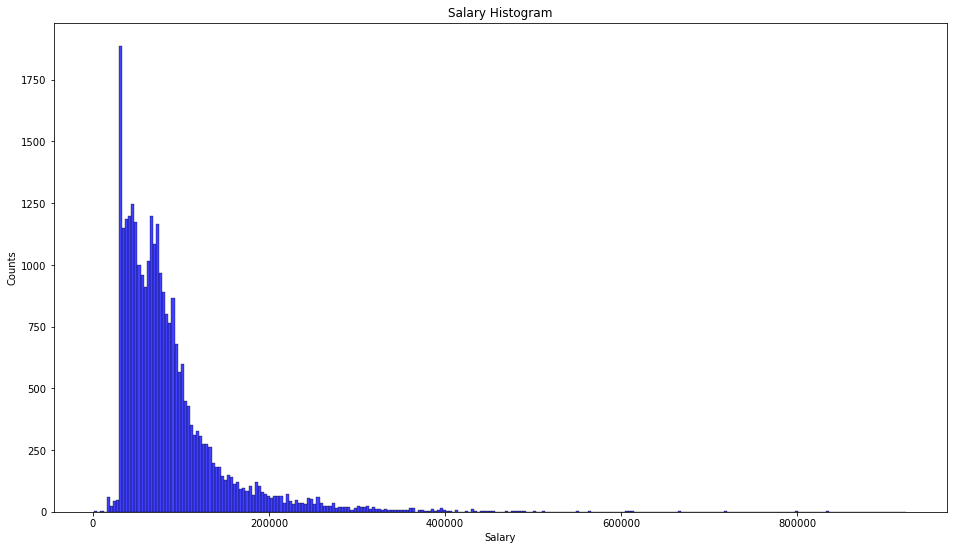

In [40]:
plt.figure(figsize=(16,9))
sns.histplot(working_df['EMPLOYEE ANNUAL BASE SALARY'],color='Blue')
plt.title("Salary Histogram")
plt.ylabel("Counts")
plt.xlabel("Salary")
plt.show()

We can see that salary is very much not normally distributed. The data is very right skewed. What this means for our data is that we likely don't want to models that will rely on normalized data. Let's take a look to see if salary is the only feature this happens with. We'll look at hire year next.

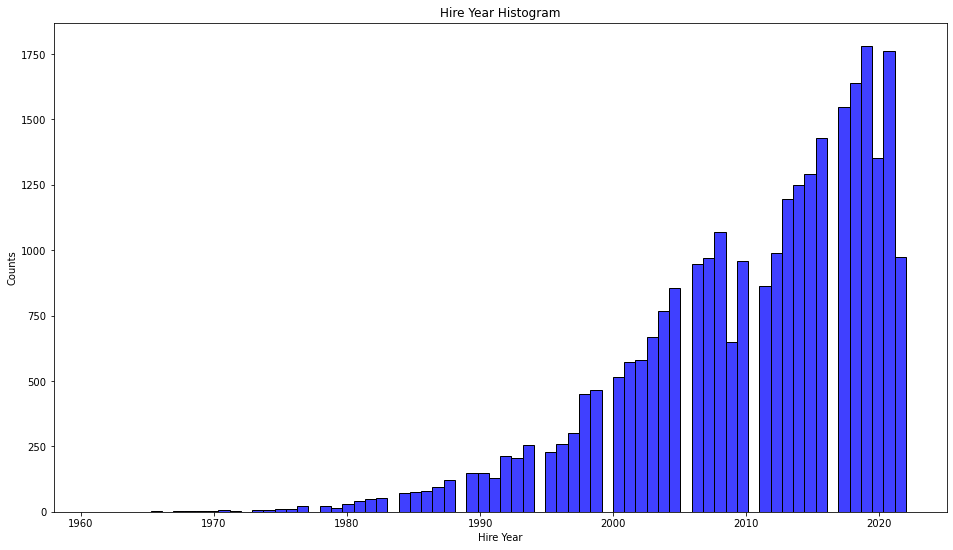

In [41]:
plt.figure(figsize=(16,9))
sns.histplot(working_df['Hire Year'],color='Blue')
plt.title("Hire Year Histogram")
plt.ylabel("Counts")
plt.xlabel("Hire Year")
plt.show()

We see a general upward trend in this data. 2022 is not fully represented as the year is still in progress. This means that the UNC System appears to be growing. As for what this means for our model, we likely don't want to use models that rely on normal distributions (ie Guassian Naive Bayes or Linear Models). We also should note that there are years that don't have any new hires. We might expect that something similar is happening with hire year as age. 

Finally we'll take a look at how our target is distributed. For this we'll need to do a little bit more leg work to get what we need. We'll need to get the value counts of our target and the name associated with these value counts. We'll create a new dataframe called visualization_df to acomplish this.

In [42]:
visualization_df = pd.DataFrame(data=zip(list(working_df["Job"].value_counts()),list(working_df["Job"].value_counts().index)),
                                columns = ['Counts','Target Value'])
visualization_df['Target Value'] = visualization_df['Target Value'].replace(inv_LabelDict)

Now we can make the visualization using our visualization dataframe.

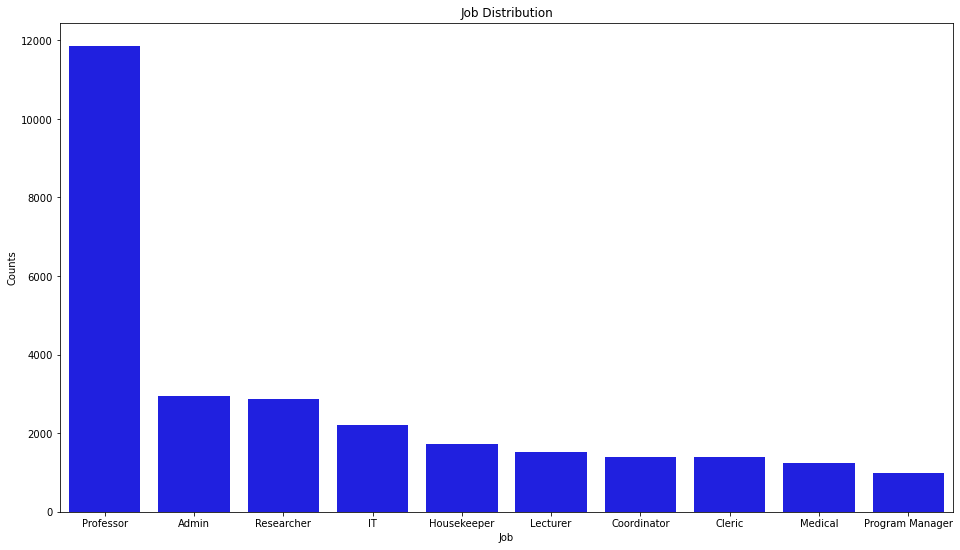

In [43]:
plt.figure(figsize=(16,9))
sns.barplot(x=visualization_df['Target Value'], y=visualization_df['Counts'],color='Blue')
plt.title("Job Distribution")
plt.ylabel("Counts")
plt.xlabel("Job")
plt.show()

Looking at this we see that we might need to balance our dataset down the road in order to get better performance.

## Model Prep
Now that we have our dataframe into terms of only numbers, let's split our model into a training dataset and a testing data set and balance our data. We'll also want to scale our salary, age and hire year variables. Let's do that first.

In [44]:
for column in ['AGE','EMPLOYEE ANNUAL BASE SALARY','Hire Year']:
    mean = working_df[column].mean()
    std = working_df[column].std()
    working_df[column] = (working_df[column] - mean)/std

Now that we have our data scaled, let's go add it to our actual dataframe.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

**Note:** The following bit of code is a function for a confusion matrix that is both pretty to look at and also gives an accuracy score. The source is cited at the end.

In [46]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

Now we split our data.

In [47]:
Train_set, test_set = train_test_split(working_df,test_size=.2,random_state = 2)

Before we start creating models we want to check if we should balance our data. The concern here is that there is not enough values in certain target classes. Let's check the value counts of our y_train.

In [48]:
Train_set['Job'].value_counts()

7    9537
0    2342
9    2290
4    1792
3    1358
5    1227
2    1119
1    1081
6    1003
8     788
Name: Job, dtype: int64

Looking at this, let's consider rebalancing the data so that each job has at least 2000 rows of data to train on.

In [49]:
copy_Train_set = Train_set.copy()
for job in Train_set['Job'].unique():
    if len(Train_set[Train_set['Job'] == job]) < 2000:
        x = 2000
        to_resample = Train_set.loc[Train_set['Job'] ==job]
        y = x - len(to_resample)
        our_resample = to_resample.sample(n = y, replace = True)
        Train_set = pd.concat([Train_set, our_resample])
print(Train_set['Job'].count())
Train_set['Job'].value_counts()

28169


7    9537
0    2342
9    2290
1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
8    2000
Name: Job, dtype: int64

Great! Now Let's go through and format our training and testing sets into X_train, X_test, y_train, y_test. This should keep the code clean.

In [50]:
X_train = Train_set.drop(columns='Job')
X_test = test_set.drop(columns='Job')
y_train = Train_set['Job']
y_test = test_set['Job']

## Modeling
It's finally time to start creating classification models for our data and evaluating them. Like we discussed in the visualization section, we want to avoid using models that will be relying on normally distributed data. Because of this we'll avoid linear models and Gaussian Naive Bayes. Decision Trees models are likely the route we will end up taking, but we'll also try K-Nearest Neighbors and SVC (this is why we scaled our data).

First we'll use a basic DecisionTreeClassifier.

In [51]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
matrix = confusion_matrix(y_test,predictions)

Now let's see a confusion matrix to see how our model performed.

<Figure size 1152x648 with 0 Axes>

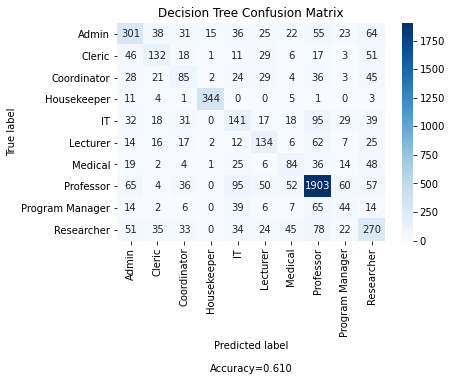

In [52]:
plt.figure(figsize=(16,9))
make_confusion_matrix(matrix,percent=False,title='Decision Tree Confusion Matrix',categories = keys)
plt.show()

60% accuracy is pretty decent, but we can get a better model using some ensemble methods. Let's use a gradient boosting classifier next.

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
clf = GradientBoostingClassifier()
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
matrix = confusion_matrix(y_test,predictions)

<Figure size 1152x648 with 0 Axes>

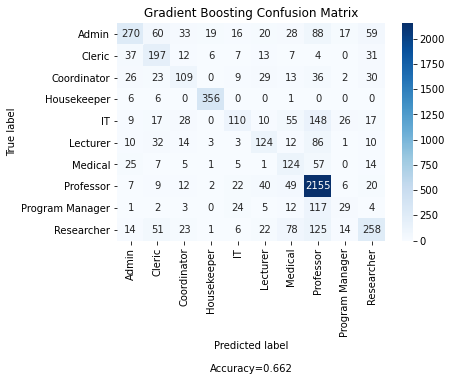

In [55]:
plt.figure(figsize=(16,9))
make_confusion_matrix(matrix,percent=False,title='Gradient Boosting Confusion Matrix', categories = keys)
plt.show()

66% is much better, but we might be able to make some improvements still. Let's try out one more algorithm, Random Forest.

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
clf = RandomForestClassifier(random_state = 1)
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
matrix = confusion_matrix(y_test,predictions)

<Figure size 1152x648 with 0 Axes>

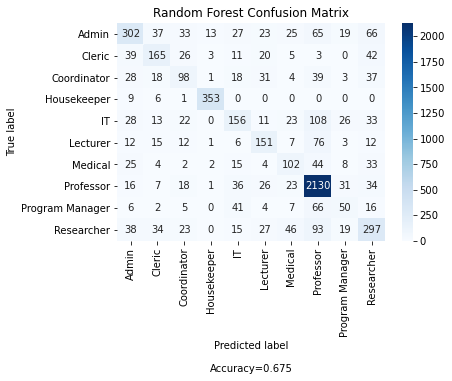

In [58]:
plt.figure(figsize=(16,9))
make_confusion_matrix(matrix,percent=False,title='Random Forest Confusion Matrix', categories = keys)
plt.show()

We see that this is better than Gradient Boosting Classifier. Let's try out some non-tree based models. First we'll start out with SVC.

In [59]:
from sklearn.svm import SVC

In [60]:
clf = SVC()
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
matrix = confusion_matrix(y_test,predictions)

<Figure size 1152x648 with 0 Axes>

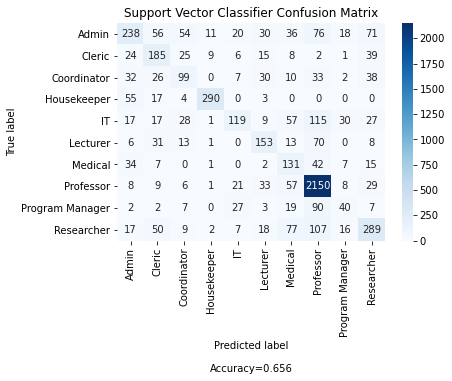

In [61]:
plt.figure(figsize=(16,9))
make_confusion_matrix(matrix,percent=False,title='Support Vector Classifier Confusion Matrix', categories = keys)
plt.show()

SVC seems to be performing as good as Random Forest. We have one more model that we'll be trying. Let's look at K-Nearest Neighbors.

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
clf = KNeighborsClassifier()
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
matrix = confusion_matrix(y_test,predictions)

<Figure size 1152x648 with 0 Axes>

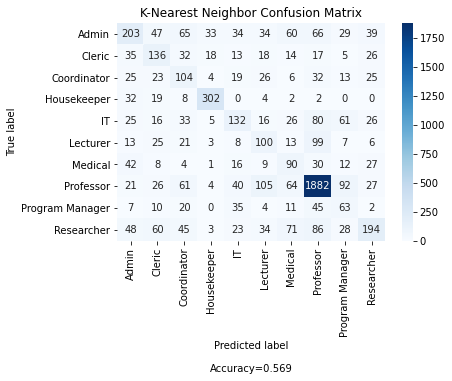

In [64]:
plt.figure(figsize=(16,9))
make_confusion_matrix(matrix,percent=False,title='K-Nearest Neighbor Confusion Matrix', categories = keys)
plt.show()

K-Nearest Neighbors performed the worst out of any model that we have tested. Random Forest our best out of the box classifier. Let's look at our feature importances and then do some parameter tuning on Random Forest.

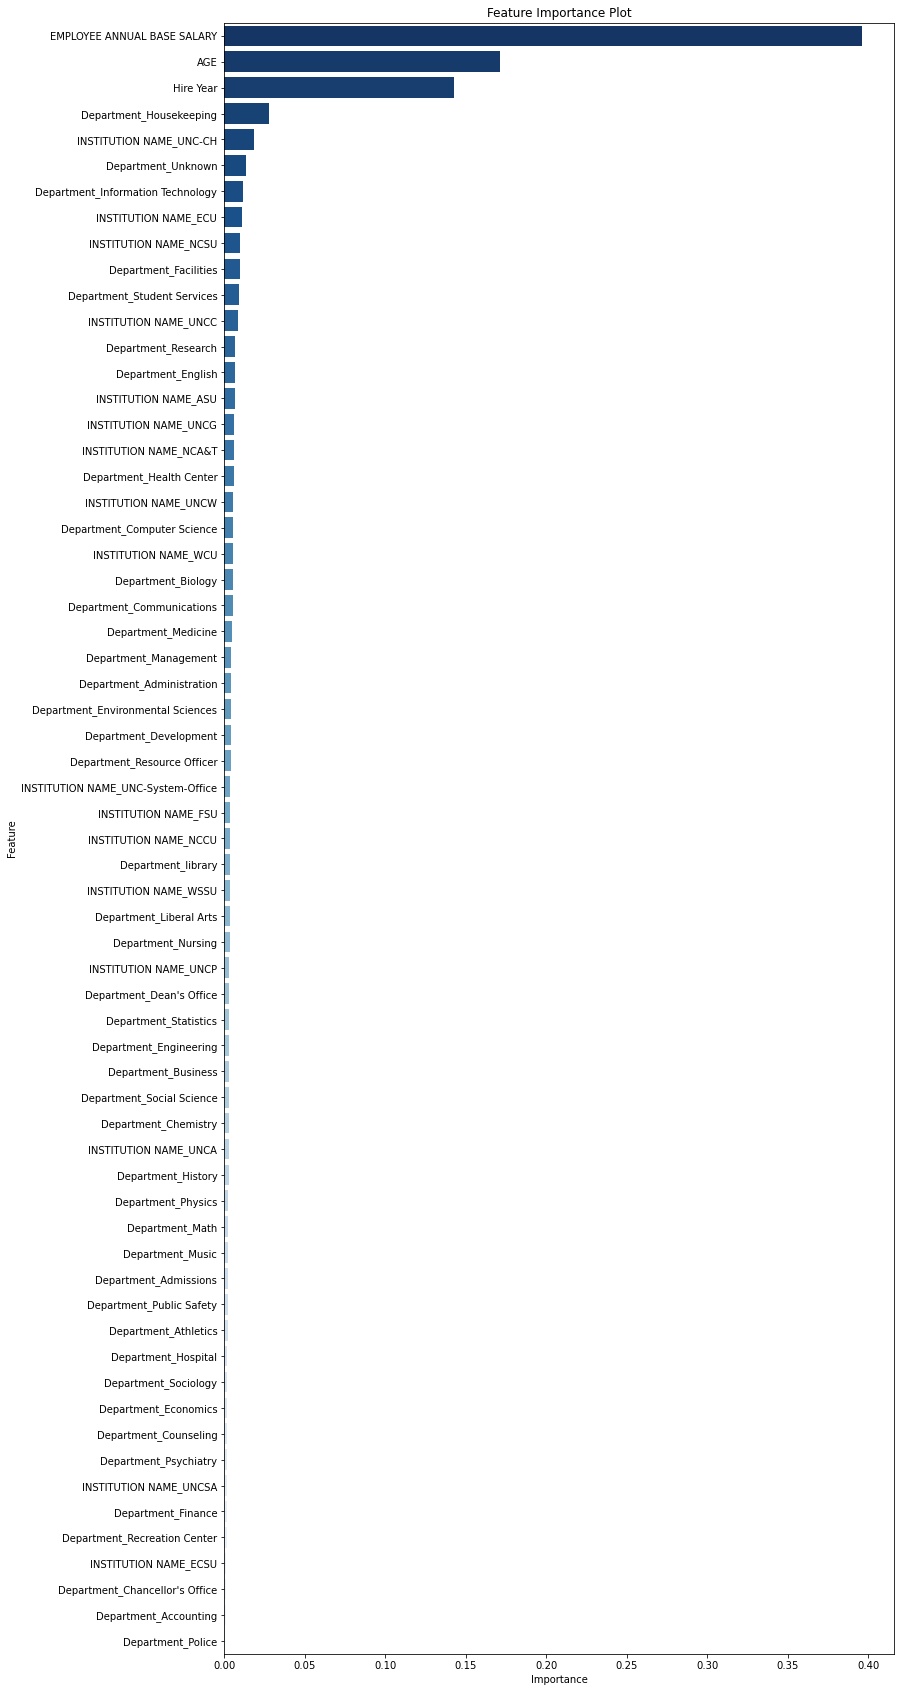

In [65]:
clf = RandomForestClassifier(random_state = 1)
clf = clf.fit(X_train,y_train)
plt.figure(figsize=(12,30))
importance_df = pd.DataFrame(list(zip(working_df.drop(columns='Job').columns,clf.feature_importances_)),
                             columns=['Feature','Importance'])
importance_df = importance_df.sort_values(by='Importance',ascending=False)
sns.barplot(x=importance_df['Importance'],y=importance_df['Feature'],palette='Blues_r')
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

As we would expect, salary makes up a large portion of our model's importance.

### Parameter Tuning
Let's go through and tune our paramets for our gradient boosting classifier. We'll set accuracy as our target for this. An article from the medium was used in reference for this. Here is the article in question: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae .

In [66]:
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import accuracy_score

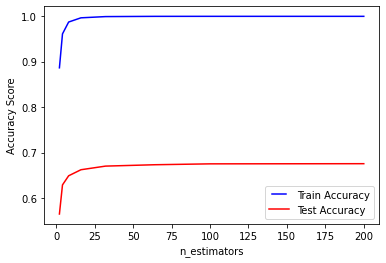

In [67]:
n_estimators = [2,4,8,16,32,64,100,200]
train_results = []
test_results = []
for estimator in n_estimators:
    
    model = RandomForestClassifier(n_estimators=estimator,random_state=1)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train,train_pred)
    train_results.append(train_acc)
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test,y_pred)
    test_results.append(test_acc)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy Score')
plt.xlabel('n_estimators')
plt.show()

n_estimators at 100 seems to be the sweet spot for estimators.

In [68]:
estimator = 100

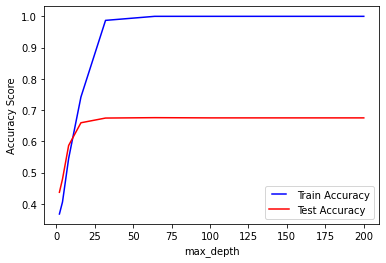

In [69]:
max_depths = [2,4,8,16,32,64,100,200]
train_results = []
test_results = []
for depth in max_depths:
    
    model = RandomForestClassifier(n_estimators = estimator, max_depth=depth,random_state=1)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train,train_pred)
    train_results.append(train_acc)
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test,y_pred)
    test_results.append(test_acc)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy Score')
plt.xlabel('max_depth')
plt.show()

64 is the best max_depth that we found as that is were performance levels out on the test accuracy.

In [70]:
max_depth = 64

I feel satisfied with this parameter tuning. We could definitely spend more time going through and tuning all of the parameters for our model, but there would be such little improvement in our model that I feel it is unnecessary.

## Final Model Performance
Now we'll train our Random Forest Classifier with the parameters we chose and determine our final performance.

In [71]:
clf = RandomForestClassifier(n_estimators = estimator, max_depth= max_depth,random_state=1)
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
matrix = confusion_matrix(y_test,predictions)

<Figure size 1152x648 with 0 Axes>

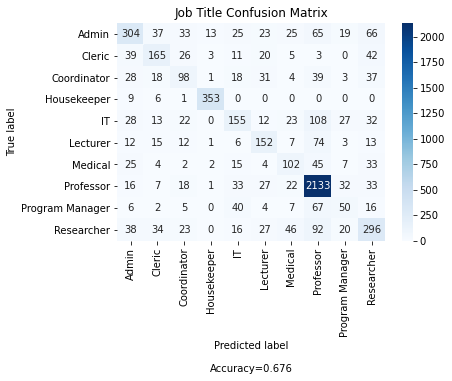

In [72]:
plt.figure(figsize=(16,9))
make_confusion_matrix(matrix,percent=False,title='Job Title Confusion Matrix',categories = keys)
plt.show()

Overall our model looks pretty good. If we were interested we might consider utilizing a soft voting classifier with SVC, Random Forest, and Gradient Boosting to hopefully get better performance. However I am satisfied with this models performance. We really only see bad accuracy when the model is predicting professor. This is likely because professors are the most occuring job title in our data set and get paid a comparable salary to both IT workers, researchers and program managers. 

# Package use and citations
 - sklearn - @article{scikit-learn,
     title={Scikit-learn: Machine Learning in {P}ython},
     author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
             and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
             and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
             Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
     journal={Journal of Machine Learning Research},
     volume={12},
     pages={2825--2830},
     year={2011}
    }
 - numpy - @Article{         harris2020array,
     title         = {Array programming with {NumPy}},
     author        = {Charles R. Harris and K. Jarrod Millman and St{\'{e}}fan J.
                     van der Walt and Ralf Gommers and Pauli Virtanen and David
                     Cournapeau and Eric Wieser and Julian Taylor and Sebastian
                     Berg and Nathaniel J. Smith and Robert Kern and Matti Picus
                     and Stephan Hoyer and Marten H. van Kerkwijk and Matthew
                     Brett and Allan Haldane and Jaime Fern{\'{a}}ndez del
                     R{\'{i}}o and Mark Wiebe and Pearu Peterson and Pierre
                     G{\'{e}}rard-Marchant and Kevin Sheppard and Tyler Reddy and
                     Warren Weckesser and Hameer Abbasi and Christoph Gohlke and
                     Travis E. Oliphant},
     year          = {2020},
     month         = sep,
     journal       = {Nature},
     volume        = {585},
     number        = {7825},
     pages         = {357--362},
     doi           = {10.1038/s41586-020-2649-2},
     publisher     = {Springer Science and Business Media {LLC}},
     url           = {https://doi.org/10.1038/s41586-020-2649-2}
    }
 - pandas - @InProceedings{ mckinney-proc-scipy-2010,
      author    = { {W}es {M}c{K}inney },
      title     = { {D}ata {S}tructures for {S}tatistical {C}omputing in {P}ython },
      booktitle = { {P}roceedings of the 9th {P}ython in {S}cience {C}onference },
      pages     = { 56 - 61 },
      year      = { 2010 },
      editor    = { {S}t\'efan van der {W}alt and {J}arrod {M}illman },
      doi       = { 10.25080/Majora-92bf1922-00a }
    }
 - matplotlib - @Article{Hunter:2007,
      Author    = {Hunter, J. D.},
      Title     = {Matplotlib: A 2D graphics environment},
      Journal   = {Computing in Science \& Engineering},
      Volume    = {9},
      Number    = {3},
      Pages     = {90--95},
      abstract  = {Matplotlib is a 2D graphics package used for Python for
      application development, interactive scripting, and publication-quality
      image generation across user interfaces and operating systems.},
      publisher = {IEEE COMPUTER SOC},
      doi       = {10.1109/MCSE.2007.55},
      year      = 2007
    }
 - seaborn - @article{Waskom2021,
    doi = {10.21105/joss.03021},
    url = {https://doi.org/10.21105/joss.03021},
    year = {2021},
    publisher = {The Open Journal},
    volume = {6},
    number = {60},
    pages = {3021},
    author = {Michael L. Waskom},
    title = {seaborn: statistical data visualization},
    journal = {Journal of Open Source Software}
     }
 - confusion matrix clean code - https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
 - Medium Article - Fraj, Mohtadi Ben. “In Depth: Parameter Tuning for Gradient Boosting.” Medium, All Things AI, 24 Dec. 2017, https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae. 